# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
#!pip install --upgrade pandas

In [2]:
#!pip install --upgrade pandas cudf-cu12 google-colab pandas-stubs xarray

In [3]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [5]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# read_csv is the function that reads the csv file and reads the data and assign it to DataFrame
df = pd.read_csv('/content/drive/MyDrive/Python/Project1-Python-Foundations-FoodHub/foodhub_order.csv')

In [7]:
# Write your code here to view the first 5 rows
# head() method returns first 5 rows by default. If we need the method to return more, need to pass the number of values as parameter.
# For example to return 9 rows use df.head(9)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [8]:
# Also get the last 5 rows so that we can better know the data
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


**Initial observations:**

1. There are 9 columns in the dataset. Each row is an order placed by a customer.
2. Dataset contains order_id, customer_id which seems to be numeric and unique
3. restauarant_name seems to be categorical data i.e. name of the restaurants
4. cuisine_type seems to be categorical data i.e name of the cuisines
5. cost_of_the_order seems to be numeric
6. day_of_the_week seems to have two values Weekend, Weekday
7. `rating` has "Not given" which will need to be handled for analyis in our further analysis.
8. food_preparation_time, delivery_time is in minutes and numeric

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [9]:
# shape returns a tuple of array dimensions (number of rows, number of columns)
# Note you can also use print statement to print the rows and columns
# where df.shape[0] represents rows and df.shape[1] represents columns
# print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")
df.shape

(1898, 9)

In [10]:
# using print statement
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:


*   The dataset has ` 1898` rows and `9` columns



### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [11]:
# info() method returns the concise summary of DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

*   There are `9` columns in the data frame.
*   All the columns have `1898 rows`. `Non-Null count is 1898`. That indicates there are `no missing rows`.
*   The columns `restaurant_name`, `cuisine_type`, `day_of_the_week`, `rating` are `object` data types and all others are `numerical` in nature (Column `cost_of_the_order` is of type `float` and columns `order_id`, `customer_id`, `food_preparation_time`, `delivery_time` are all of type `int64`).
*   `info()` also provides the memory usage and as per the results the memory usage is `133.6+ KB`



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [12]:
# isnull() returns boolean if the values are NA for each column in a row.
# sum() returns sum of the each column
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:


*   There are `no missing` values in the data based on the null values since df.isnull().sum() returned `0s` for all columns.



But if we check the dataset, rating column has a value "**Not given**" which can be considered as a missing data based on how it affects the analysis. Need to analyze if it needs to be imputed i.e. shoud be replaced with 0 or NaN or it can stay as it is.

**Decide based on Objective Statement:** Get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.

In order to achieve the objective, we need to analyze the impact of rating column having `Not given` by following the steps below:
1. Get the `percentage of orders` that has the rating as "**Not given**". If the percentage is more, then we need to impute the value.
2. Check if `more number of orders` have rating "**Not given**" is associated with a particular customer or a particular restaurant or a particular cuisine or because of day of the week.
3. `Compare orders` with other ratings based on cost of the order, food preparation time or delivery time and see if 'Not given' is going impact the analysis.
4. Find the `correlation` with other variables.

In [13]:
# 1. Get the percentage of rows that has "Not given"
print(df['rating'].value_counts(normalize=True))

rating
Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: proportion, dtype: float64


Percentage of orders with rating 'Not given': `38.78%`, which is significant but can be decided after finding other factors. Whereas `5-star` ratings are `30.98%`, `4-star` ratings are `20.34%` and `3-star` ratings are `9.91%`.

In [14]:
#2. Check if more number of orders have rating "Not given" is associated with a particular customer
#or a particular restaurant or a particular cuisine or because of day of the week.
# Making a list of all factor variables and loop through each variable and see the rating got affected by groupby on the variable.
factor_cols =  ['customer_id','restaurant_name', 'cuisine_type', 'day_of_the_week']
for column in factor_cols:
    print(df[df['rating'] == 'Not given'].groupby([column],observed=False).size())
    print("-" * 50)

customer_id
1311      1
5693      1
6987      1
7567      1
14869     1
         ..
399520    1
399584    1
403833    1
404649    1
405334    1
Length: 599, dtype: int64
--------------------------------------------------
restaurant_name
12 Chairs           2
5 Napkin Burger     3
Alidoro             1
Amma                2
Amy Ruth's          1
                   ..
Zero Otto Nove      1
brgr                1
da Umberto          2
ilili Restaurant    5
indikitch           2
Length: 134, dtype: int64
--------------------------------------------------
cuisine_type
American          216
Chinese            82
French              8
Indian             23
Italian           126
Japanese          197
Korean              4
Mediterranean      14
Mexican            29
Middle Eastern     15
Southern            4
Spanish             6
Thai               10
Vietnamese          2
dtype: int64
--------------------------------------------------
day_of_the_week
Weekday    207
Weekend    529
dtype: int64


Based on the above results, there is no indication of a particular customer or a restaurant or a cuisine type or a day of the week that has caused the customer not to give a rating.

In [15]:
#3. Compare orders with other ratings based on cost of the order, food preparation time or delivery time and see if 'Not given' is going impact the analysis.
# Making a list of all factor variables and loop through variables and find the average of the variable using mean()
factor_cols =  ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
for column in factor_cols:
    print(df.groupby('rating')[[column]].mean())
    print("-" * 50)

           cost_of_the_order
rating                      
3                  16.223351
4                  16.710337
5                  16.965697
Not given          16.085340
--------------------------------------------------
           food_preparation_time
rating                          
3                      27.430851
4                      27.396373
5                      27.355442
Not given              27.357337
--------------------------------------------------
           delivery_time
rating                  
3              24.558511
4              23.867876
5              24.212585
Not given      24.173913
--------------------------------------------------


Almost all other ratings have almost same cost of the order, food preparation time and delivery time as 'Not given' and does not find significant difference.

Based on the above comparison data, there is no indication that cost of the order or food preparation time or delivery time has made the customer to give no rating.


In [16]:
# Get the summary statistics of the numerical data. For non-numeric columns, the summary displays NaN for statistical values like mean, std etc.
# In the following method describe(), include='all' returns all columns and T returns transpose of the data.
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


**Why do we need to impute if there is no indication that it affects the data?**

1. Having 'Not given' in the rating indicates that for those orders we don't know how customer would have rated if they would have rated and keeping it as it is will affect calculations like averages and correlations because the rating column is not a numeric type. Other than 'Not given' all other ratings are numeric.

2. For statistical summaries too, it shows NaN for mean etc. You can check the describe method above where mean, std, min and all other values are computed as NaN.

3. During our analysis wherever we need do numeric computations we need to specify where rating != 'Not given'.

In order to make the rating column as numeric, there are two ways we can do it.

Either replace the value 'Not given' with NaN or 0.

**Analysis on value to replace 'Not given'**
1. Analyze replacing with 0
2. Analyze replacing with 1


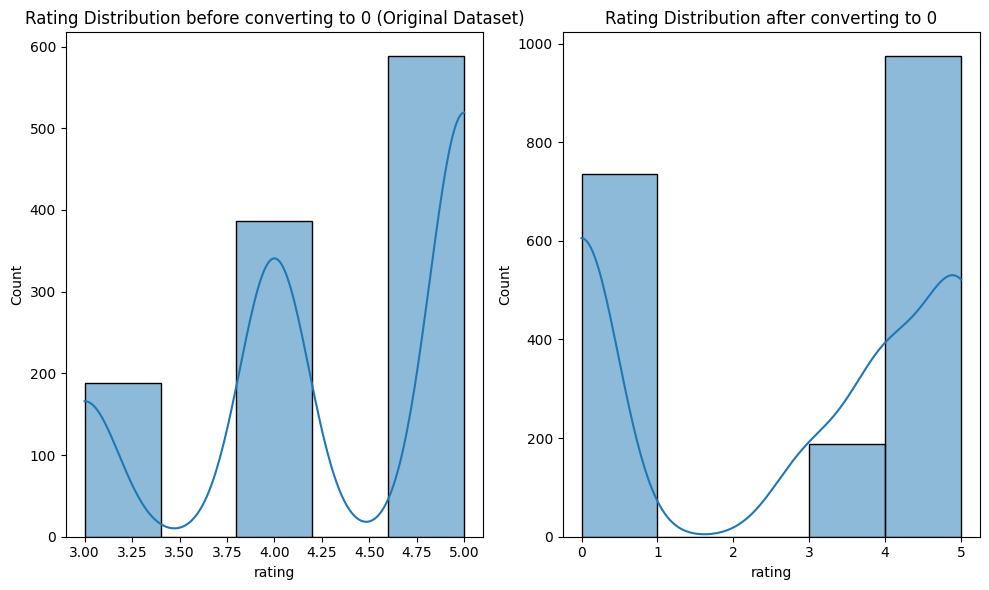

Mean rating = 4.344234079173838 Mean rating after converting to 0= 2.6596417281348788


In [17]:
#Analyze replacing 'Not given' with 0
#1. plot the graph by excluding the 'Not given' value
#2. Copy the data frame into another variable and replace 'Not given' with 0 and plot another graph and compare.
df_replace_with_zero = df.copy()
df_replace_with_zero['rating'] = df_replace_with_zero['rating'].replace('Not given', 0).astype(float)

plt.figure(figsize=(10, 6))

#Original graph before converting to 0
plt.subplot(1,2,1)
sns.histplot(df[df['rating'] != 'Not given']['rating'].astype(float), kde=True, bins=5)
plt.title('Rating Distribution before converting to 0 (Original Dataset)')
plt.subplot(1,2,2)
sns.histplot(df_replace_with_zero['rating'], kde=True, bins=5)
plt.title('Rating Distribution after converting to 0')

plt.tight_layout()
plt.show()

#3. Calculate the mean and correlations for both
mean_rating = df[df['rating'] != 'Not given']['rating'].astype(float).mean()
mean_rating_after_zero = df_replace_with_zero['rating'].mean()
print('Mean rating =',mean_rating,'Mean rating after converting to 0=', mean_rating_after_zero)

Original Dataset shows the ratings without 'Not given' show a relatively normal distribution with a higher concentration in the upper ratings (3, 4 and 5 stars)

After converting to 0, the distribution shows a significant spike at 0 pulling the overall distribution downwards.

Also original mean rating is 4.34 and after converting to 0 is 2.66 which shows a significant decrease suggesting a much lower customer rating than the original rating.

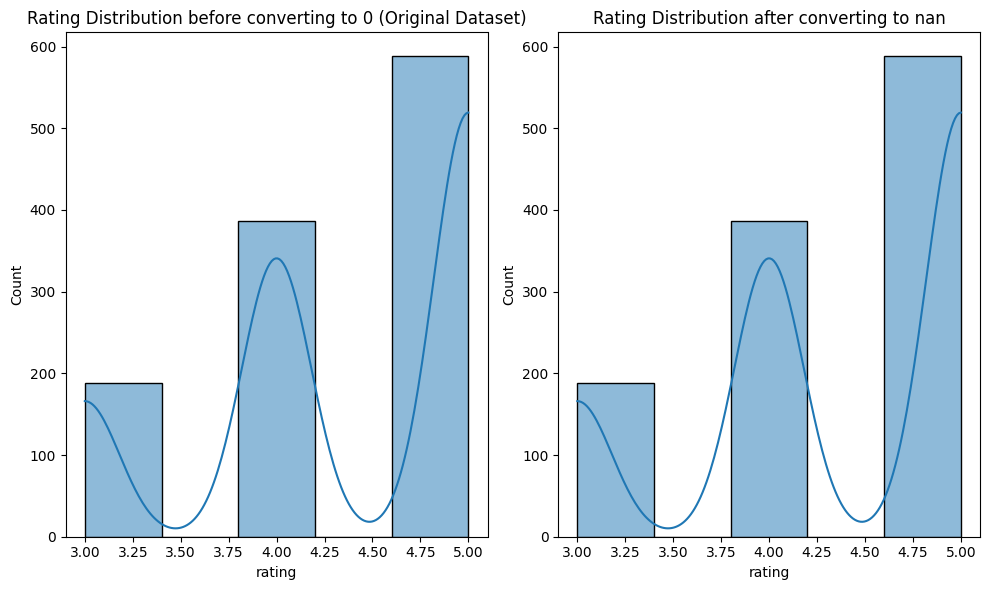

Mean rating = 4.344234079173838 Mean rating after converting to nan= 4.344234079173838


In [18]:
#Analyze replacing 'Not given' with NaN
#1. plot the graph by excluding the 'Not given' value
#2. Copy the data frame into another variable and replace 'Not given' with NaN and plot another graph and compare.
df_replace_with_NaN = df.copy()
df_replace_with_NaN['rating'] = df_replace_with_NaN['rating'].replace('Not given', np.nan).astype(float)

plt.figure(figsize=(10, 6))

#Original graph before converting to 0
plt.subplot(1,2,1)
sns.histplot(df[df['rating'] != 'Not given']['rating'].astype(float), kde=True, bins=5)
plt.title('Rating Distribution before converting to 0 (Original Dataset)')
plt.subplot(1,2,2)
sns.histplot(df_replace_with_NaN['rating'], kde=True, bins=5)
plt.title('Rating Distribution after converting to nan')

plt.tight_layout()
plt.show()

#3. Calculate the mean and correlations for both
mean_rating = df[df['rating'] != 'Not given']['rating'].astype(float).mean()
mean_rating_after_nan = df_replace_with_NaN['rating'].mean()
print('Mean rating =',mean_rating,'Mean rating after converting to nan=', mean_rating_after_nan)

Original Dataset shows the ratings without 'Not given' show a relatively normal distribution with a higher concentration in the upper ratings (3, 4 and 5 stars)

After converting to nan, the distribution shows same pattern as original.

Also original mean rating is 4.34 and after converting to nan is 4.34 which shows it did not change the mean value.

**Overall decision on imputing**
1. Treating 'Not given' as NaN indicates that those are missing values and we can ignore it during calculations.
2. This also helps in avoiding making assumptions that customers who did not rate are because they are not satisfied with the orders.
3. Keeping the value 'Not given' as it is might lead to incorrect insights or incorrect analysis of the data in correlation with other variables.

***So, imputing the value to `nan` is the right approach for the data.***



In [19]:
# Treatment of data
# Based on above decision let's replace 'Not given' with np.nan and convert the rating column as float type
df['rating'] = df['rating'].replace('Not given', np.nan).astype(float)

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [20]:
# Get the statistical summary of the data.
# In the following method, include='all' returns all columns and T returns transpose of the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1162.0,NaN,NaN,NaN,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
**Statistical Summary of the Data**

Let's calculate the skewness of the data.
1. **cost_of_the_order**: `Mean > Median` and so `Positively` or `Right` skewed.
2. **food_preparation_time**: `Mean` and `Median` are `27.37` and `27.0`. So, `Slightly Positive` but `Nearly Symmetric`.
3. **delivery_time**: `Mean < Median` and so, `Slightly Negative` or `Left Skewed`.
4. **rating**: `Mean < Median` and so, rating column is `negatively` skewed


Other observations:
*   There are `178` restaurants in the data set and popular restaurant name is `Shake Shack`.
*   There are `14` cuisine types in the data set and popular is `American`.
*   The cost of the order ranges from `4.47` to `35.41` dollars and average is `16.49` dollars. `25%` of the cost is `12.08` or `below`.
*   Based on the column day_of_the_week, most of the orders are placed on the `weekend`.
*   Customers gave ratings only for `1162` orders. That means customers did not give rating for `736` orders. Minimum rating given was `3` and maximum is `5`.
*   Delivery time ranges from `15 - 33 minutes` and average delivery time is `24.16` minutes.





**Minimum, Average, and Maximum time it takes for food to be prepared once an order is placed**

* **Minimum**: 20 minutes
* **Average**: 27.37 minutes
* **Maximum**: 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [21]:
# There are original rows in the data frame having rating value as 'Not given' that we have replaced with np.nan.
# Need to query for dataset column rating where values are NaN by calling isna() method and return those orders and perform sum() to get total number of orders
# Here we are going to assign it the variable unrated_orders to get the list of orders that are not rated.
unrated_orders = df['rating'].isna().sum()
# Print the number of orders that are not rated by the customers
print('Number of orders not rated by the customers: ',unrated_orders)
# Print the percentage of the total orders that are not given by the customers
print('It amounts to',round((unrated_orders/df.shape[0])*100, 2),'% of total orders')

Number of orders not rated by the customers:  736
It amounts to 38.78 % of total orders


#### Observations:


*   There are `736` orders that are not rated by customers out of 1898 orders which is `38.78%` of total orders




### Exploratory Data Analysis (EDA)

**Analysis of the data**

Before going to proceed with EDA, we need to check for the following:
1. Are there any duplicate entries in the data?
2. Did customers place multiple orders?
3. Are there multiple orders placed from same restaurant?


In [22]:
# Get unique order ids
# To check that we need to check the total number of unique values in the order_id column
print('There are ',df['order_id'].nunique(),' unique orders found in the data' )

There are  1898  unique orders found in the data


There are `1898` unique orders found in the data and no duplicates found.

In [23]:
# Are there any duplicate entries in the data?
# duplicated() method returns the number of duplicates and sum() will return overall total number of duplicate entries.
print('There are ',df.duplicated().sum(), ' number of duplicate entries in the data')

There are  0  number of duplicate entries in the data


No duplicate entries found. So we don't have to drop data for further analysis.

In [24]:
# Did customers place multiple orders?
# To check that we need to check the total number of unique values in the customer_id column
print('There are ',df['customer_id'].nunique(),' unique customers found in the data' )

There are  1200  unique customers found in the data


*   There are a total of `1200` different customers in the data.
*   That means some of the customers might have placed multiple orders. So we need to identify those customers during our analysis.


In [25]:
# Are there multiple orders placed from same restaurant?
# To check that we need to check the total number of unique values in the restaurant_name column
print('There are ',df['restaurant_name'].nunique(), 'unique restaurants found in the data')

There are  178 unique restaurants found in the data


*   There are a total number of `178` different restaurants in the data.
*   That means, some of the restaurants have received/served multiple orders. So we need to identify those restaurants during analysis.

In [26]:
# How many unique cuisines are in the data?
# To check that we need to check the total number of unique values in the cuisine_type column
print('There are ',df['cuisine_type'].nunique(), 'unique cusines found in the data')

There are  14 unique cusines found in the data


* There are `14` unique cuisines found in the data.
* That means multiple customers would have ordered same cuisine type multiple times.

In [27]:
# How many unique days of the week are in the data?
# To check that we need to check the total number of unique values in the day_of_the_week column
print('There are ',df['day_of_the_week'].nunique(), 'unique day of the week found in the data')

There are  2 unique day of the week found in the data


There are  `2` unique day of the week found in the data. We know they are Weekends and Weekdays.

In [28]:
# How many unique rating values are in the data?
# To check that we need to check the total number of unique values in the rating column
print('There are ',df['rating'].nunique(), 'unique ratings found in the data')

There are  3 unique ratings found in the data


Since we converted 'Not given' to nan, we get 3 unique ratings in the data as it skips the data with np.nan. So total there are 4 rating types.

Based on the analysis, customer_id and order_id are numeric values but they don't have any significance for statistical summary and so they can be converted to object types so that they don't participate in analysis for numeric columns.


In [29]:
# Convert customer_id and order_id to object types
df['customer_id'] = df['customer_id'].astype('object')
df['order_id'] = df['order_id'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


In [30]:
# Based on the data, the cusine_type, restaurant_name and day_of_the_week seems to be categorical variables
# As they contain fixed number of possible values and mostly can be label for the data.
# Other benefit of category type is memory and performance benefits.
df["restaurant_name"]=df["restaurant_name"].astype("category")
df["cuisine_type"]=df["cuisine_type"].astype("category")
df["day_of_the_week"]=df["day_of_the_week"].astype("category")
# Check the conversions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   object  
 1   customer_id            1898 non-null   object  
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1162 non-null   float64 
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(2), int64(2), object(2)
memory usage: 102.7+ KB


**Observations:**

We observe that memory usage has been reduced from `133.6+ KB` to `102.7+ KB` and order_id, customer_id are object types, restaurant_name, cuisine_type, day_of_the_week are category variables and remaining are numeric types.

### Let's check the count and percentage of categorical levels in each column

In [31]:
# Making a list of all category variables that are needed for analysis
category_cols =  ['restaurant_name', 'cuisine_type', 'day_of_the_week']

# Printing the count of unique items in each column
for column in category_cols:
    print(df[column].value_counts())
    print("-" * 50)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: count, Length: 178, dtype: int64
--------------------------------------------------
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64
--------------------------------------------------
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64
--------------------------------------------------


**Observations**
*   **Highest number (`219`)** of the orders are received/served by the restaurant **"`Shake Shack`"** followed by **`132` orders** by "**`The Meatball Shop`**".
*   Most of the orders were placed for **`American cuisine type` (`584`)** followed by **`Japanese cuisine type` (`470`)**.
*   Most of the orders **(`1351`)** are made on the **`weekend`**.



In [32]:
# Let's create some analysis data that is useful in the following sections

# restaurant analysis - group by restaurant_name and apply agg and create data with average rating, average delivery time, average cost, count of orders
restaurant_analysis = df.groupby('restaurant_name',observed=True).agg(
    avg_rating=('rating', 'mean'),
    rating_count=('rating','count'),
    avg_delivery_time=('delivery_time', 'mean'),
    avg_cost=('cost_of_the_order', 'mean'),
    count_of_orders=('order_id', 'count'),
    total_revenue = ('cost_of_the_order','sum'),
    num_weekday_orders=('day_of_the_week', lambda x: (x == 'Weekday').sum()),
    num_weekend_orders=('day_of_the_week', lambda x: (x == 'Weekend').sum())
).reset_index()

# Sorting by avg_rating for easier interpretation
restaurant_analysis_sorted = restaurant_analysis.sort_values(by='count_of_orders', ascending=False)

restaurant_analysis_sorted

,restaurant_name,avg_rating,rating_count,avg_delivery_time,avg_cost,count_of_orders,total_revenue,num_weekday_orders,num_weekend_orders
136,Shake Shack,4.278195,133,24.662100,16.344886,219,3579.53,74,145
153,The Meatball Shop,4.511905,84,24.242424,16.251591,132,2145.21,37,95
21,Blue Ribbon Sushi,4.219178,73,23.941176,15.999580,119,1903.95,34,85
20,Blue Ribbon Fried Chicken,4.328125,64,24.145833,17.315521,96,1662.29,22,74
109,Parm,4.128205,39,25.500000,16.364118,68,1112.76,26,42
...,...,...,...,...,...,...,...,...,...
85,Klong,5.000000,1,24.000000,29.050000,1,29.05,0,1
83,Kambi Ramen House,5.000000,1,19.000000,32.930000,1,32.93,0,1
77,Il Bambino,4.000000,1,29.000000,29.250000,1,29.25,0,1
76,Hunan Manor,5.000000,1,26.000000,5.720000,1,5.72,1,0


In [33]:
# Let's create some analysis data that is useful in the following sections

# Cuisine type analysis - group by restaurant_name and apply agg and create data with average rating, average delivery time, average cost, count of orders
cuisine_type_analysis = df.groupby('cuisine_type',observed=True).agg(
    avg_rating=('rating', 'mean'),
    avg_delivery_time=('delivery_time', 'mean'),
    rating_count=('rating','count'),
    avg_cost=('cost_of_the_order', 'mean'),
    count_of_orders=('order_id', 'count'),
    num_weekday_orders=('day_of_the_week', lambda x: (x == 'Weekday').sum()),
    num_weekend_orders=('day_of_the_week', lambda x: (x == 'Weekend').sum())
).reset_index()

# Sorting by avg_rating for easier interpretation
cuisine_type_analysis_sorted = cuisine_type_analysis.sort_values(by='avg_rating', ascending=False)

cuisine_type_analysis_sorted

,cuisine_type,avg_rating,avg_delivery_time,rating_count,avg_cost,count_of_orders,num_weekday_orders,num_weekend_orders
11,Spanish,4.833333,23.416667,6,18.994167,12,1,11
12,Thai,4.666667,23.157895,9,19.207895,19,4,15
3,Indian,4.540000,24.082192,50,16.919726,73,24,49
8,Mexican,4.416667,24.389610,48,16.933117,77,24,53
5,Japanese,4.373626,24.131915,273,16.304532,470,135,335
4,Italian,4.360465,24.567114,172,16.418691,298,91,207
1,Chinese,4.338346,23.855814,133,16.305209,215,52,163
10,Southern,4.307692,23.823529,13,19.300588,17,6,11
2,French,4.300000,25.333333,10,19.793889,18,5,13
0,American,4.298913,24.193493,368,16.319829,584,169,415


In [34]:
# Analyze how often customers reorder from the same restaurant - Customer loyalty
# Step 1: Group by customers and restaurants to get the number of orders placed for each restaurant by a customer
customers_orders_analysis = df.groupby(['customer_id','restaurant_name'], observed=False).agg(
    num_orders = ('order_id','count')
).reset_index()

# Calculate the total unique customers
unique_customers = df['customer_id'].nunique()

# Identify customers who are loyal i.e. placed more than 1 order.
# Assuming number of orders placed more than 1 is considered as loyal. The value can be changed based on the use case.
customer_who_are_loyal = customers_orders_analysis[customers_orders_analysis['num_orders']>1]

# Calculate the number of unique loyal customers
customers_loyal_count = customer_who_are_loyal['customer_id'].nunique()

# Calculate the percentage of loyal customers
customers_loyal_percentage = (customers_loyal_count / unique_customers) * 100

# Print the percentage of customers who have placed more than 1 orders
print (f"Percentage of customers who have placed more than 1 orders: {round(customers_loyal_percentage,2)}%")

Percentage of customers who have placed more than 1 orders: 27.33%


**Observations:**

Percentage of customers who have placed more than 1 orders are `27.33%`. These are the customers who are likely to come back and should be considered as `loyal`.

In [35]:
# Analyze customer preferences based on cuisines they ordered
# Step 1: Group by customers and cuisine types to get the customer orders placed for each cuisine
customers_cuisine_analysis = df.groupby(['customer_id','cuisine_type'], observed=False).agg(
    num_orders = ('order_id','count')
).reset_index()

# Step 2: Identify the customers who have placed more than 5 orders.
# Note: 5 is considered to be ideal. But, as requirements change, we can change the threshold to some other values
frequent_customers = customers_cuisine_analysis[customers_cuisine_analysis['num_orders'] > 5]

# Step 3: Get only the orders of frequent customers
frequent_customer_orders = df[df['customer_id'].isin(frequent_customers['customer_id'])]

# Step 4: calculate the orders for each cuisine type by frequent customers
frequent_customer_cuisines = frequent_customer_orders.groupby('cuisine_type', observed=False).agg(
    num_orders = ('order_id','count')
).reset_index()

# Step 5: calculate the total number of orders for each cuisine type
total_orders = df.groupby('cuisine_type', observed=False).agg(
    total_orders = ('order_id','count')
).reset_index()

# Step 6: Merge both frequent customer orders with total orders
cuisine_order_percentage = frequent_customer_cuisines.merge(total_orders, on='cuisine_type')

# Step 7: calculate the percentage of orders / frequent customers for each cuisine
cuisine_order_percentage['frequent_order_percentage'] = (cuisine_order_percentage['num_orders']/
                                                   cuisine_order_percentage['total_orders']) * 100
# Print the frequent order percentage
print(cuisine_order_percentage[['cuisine_type', 'frequent_order_percentage']])

      cuisine_type  frequent_order_percentage
0         American                   2.739726
1          Chinese                   0.000000
2           French                   0.000000
3           Indian                   8.219178
4          Italian                   0.671141
5         Japanese                   2.553191
6           Korean                   0.000000
7    Mediterranean                   0.000000
8          Mexican                   0.000000
9   Middle Eastern                   0.000000
10        Southern                   0.000000
11         Spanish                   0.000000
12            Thai                   0.000000
13      Vietnamese                   0.000000


**Observations:**

`American`, `Indian`, `Italian` and `Japanese` have frequent order percentage > 0. These are the `most preferred cuisines` by the customers.

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Univariate Analysis deals with single variable and understand the distribution of the single variable and identify any outliers.

In the dataset, we have cost_of_the_order, food_preparation_time and delivery_time which are of numerical types.

In the dataset, we have cuisine_type, day_of_the_week and restaurant_name which are of categorical types.

For numerical types, we can use histogram and count plots for category types.

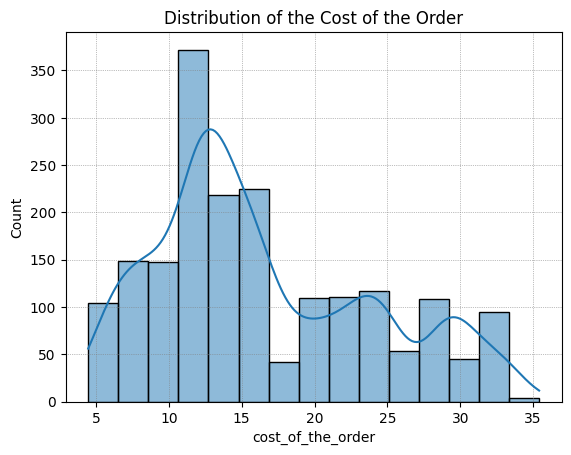

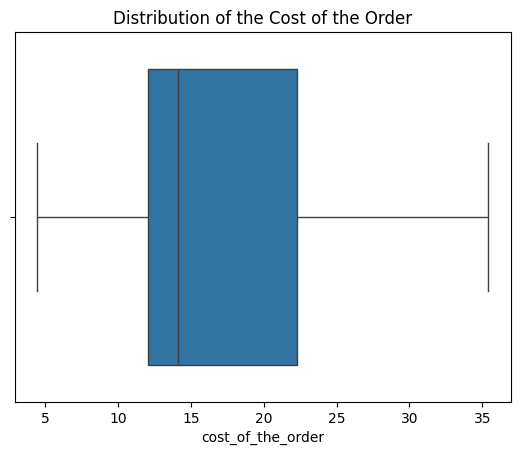

In [36]:
# Distribution of cost_of_the_order
# Histogram helps to understand the distribution of the variable cost_of_the_order.
sns.histplot(data=df,x='cost_of_the_order', bins=15, kde=True)
plt.title('Distribution of the Cost of the Order')

# Add grid lines to accurately check the distribution and mark the KDE
plt.grid(True, which='both', linestyle=':', linewidth=0.5, color='gray')

plt.show()
# Boxplot provides the distribution of costs and also determines mean and quartiles.
sns.boxplot(data=df,x='cost_of_the_order')
plt.title('Distribution of the Cost of the Order')
plt.show()

**Observations:**
*   The distribution of the cost of the orders is `slightly right skewed` (Mean > Median).That means most of the orders are from lower price range.
*   Most of the orders are less than `$20`.
*   Higher density is between `$10` and `$15` where most of the orders fall in that range.
*   The density is decreasing as cost is increasing indicating the less number of customers are placing higher cost orders.
*   Minimum order cost was `$4.47` and maximum was `$35.41`.
*   There are `no outliers` detected.

From boxplot,
Q1 = 4.7
Q2 = 13
Q3 = 22.5
Q4 = 35.5 indicates same observations from histogram.


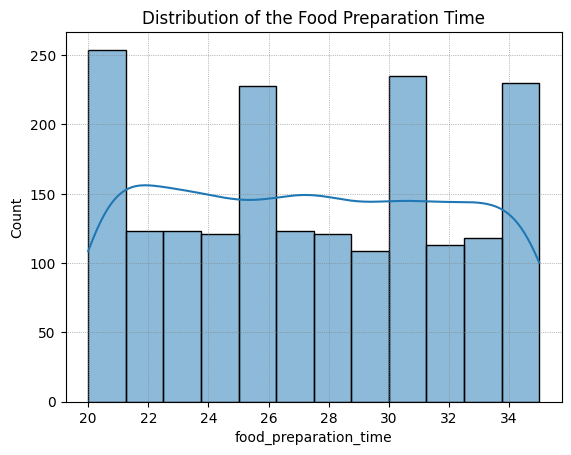

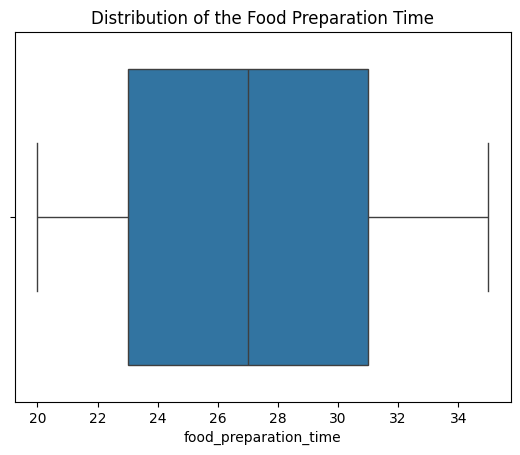

In [37]:
# Distribution of food_preparation_time
sns.histplot(data=df,x='food_preparation_time', kde=True)
plt.title('Distribution of the Food Preparation Time')
# Add grid lines to accurately check the distribution
plt.grid(True, which='both', linestyle=':', linewidth=0.5, color='gray')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.title('Distribution of the Food Preparation Time')
plt.show()


**Observations**

*   Most of the food preparation times are between `20 minutes` to `35 minutes`.
*   `Mean` and `Median` are `27.37` and `27.0` (almost same) and so, the graph is `slightly positive` but `nearly symmetric` in nature.
*   There are `no outliers` identified.

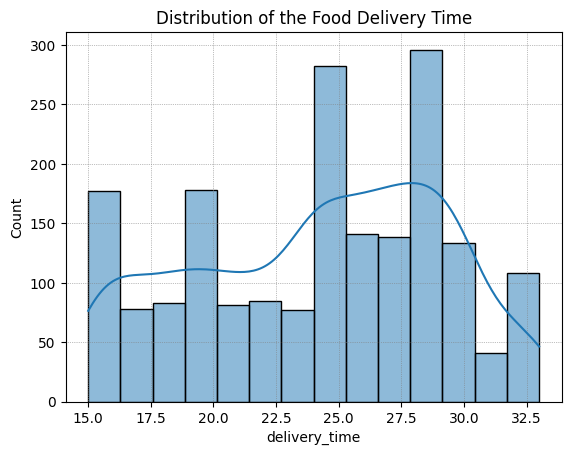

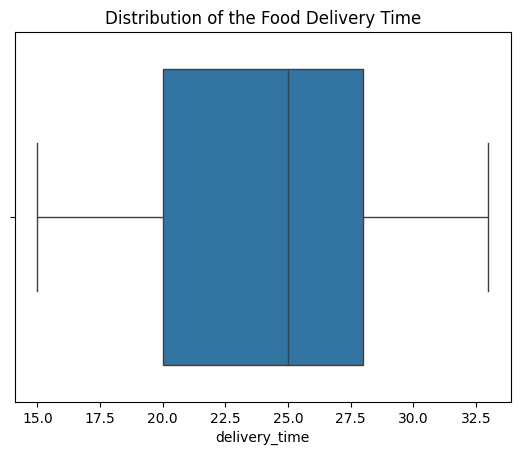

In [38]:
# Distribution of delivery_time
sns.histplot(data=df,x='delivery_time', kde=True)
plt.title('Distribution of the Food Delivery Time')
# Add grid lines to accurately check the distribution
plt.grid(True, which='both', linestyle=':', linewidth=0.5, color='gray')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.title('Distribution of the Food Delivery Time')
plt.show()


**Observations**

* The graph is `slightly negative` or `left skewed` as mean is `24.161` and median is `25`.
* Mininmum delivery time is `15` minutes and max deliver time is `33` minutes.
* More number of orders have delivery time between `25` and `28` minutes
* There are `no outliers` identified.

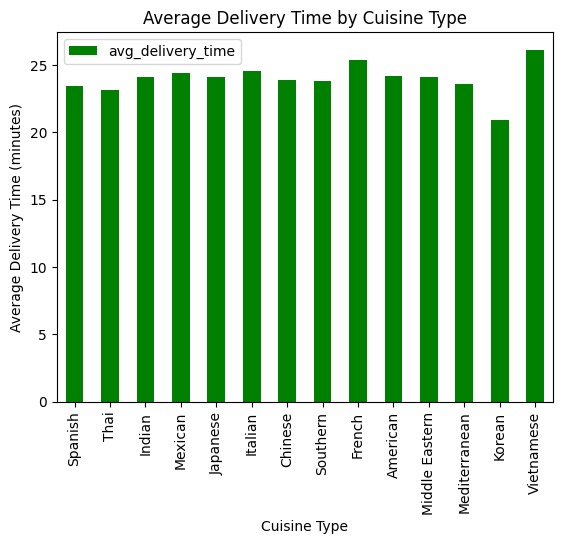

In [39]:
# Average delivery time by Cuisine Type
# Helps in figuring out the average delivery time for each cuisine type.
cuisine_type_analysis_sorted.plot(kind='bar', x='cuisine_type', y='avg_delivery_time', color='green')
plt.title('Average Delivery Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Delivery Time (minutes)')
plt.xticks(rotation=90)
plt.show()

**Observations:**

1. `Vietnamese` and `French cuisine` types took longer delivery times compared to others where `Vietnamese` was the longest over all.
2. `Korean`, `Thai` cuisines took shorter delivery times compared to others. `Korean` took short delivery time over all.
3. Other cuisine types have relatively same delivery times.

Reducing the longer wait times might improve customer satisfaction.

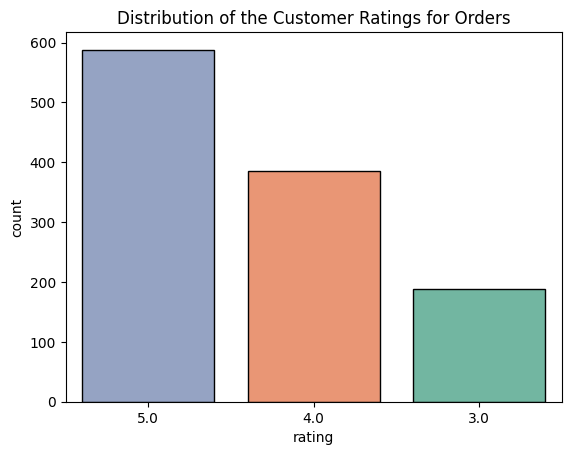

In [40]:
# Distribution of Rating

# Set the color palette based on the number of bars
palette = sns.color_palette('Set2', 3)
sns.countplot(data=df,x='rating',hue='rating', palette=palette, legend=False, edgecolor='black', order=df['rating'].value_counts().index)
plt.title('Distribution of the Customer Ratings for Orders')
plt.show()


In [41]:
df.rating.value_counts()

,count
rating,
5.0,588
4.0,386
3.0,188


**Observations:**
1. There are `588` orders that received `5 stars`
2. There are `386` orders that received `4 stars`
3. There are `188` orders that received `3 stars`
4. Remaining `736` orders are `not rated`.

The ratings show a skew towards higher values indicating that most customers are generally satisfied, though there are few lower ratings that needs to be analyzed further.

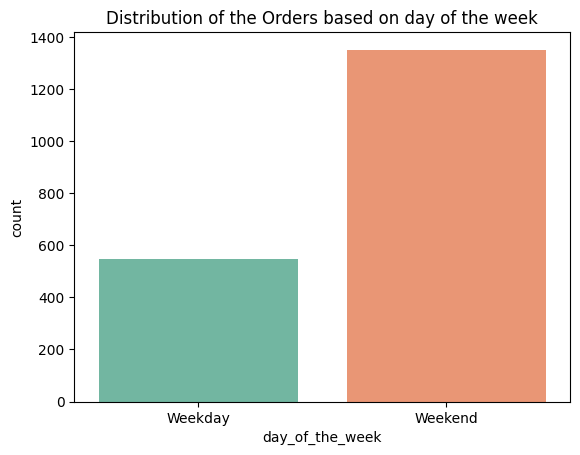

In [42]:
# Distribution of Day of the week
# Determine the number of unique bars (categories)
num_bars = len(df['day_of_the_week'].unique())

# Set the color palette based on the number of bars
palette = sns.color_palette('Set2', num_bars)
sns.countplot(data=df,x='day_of_the_week',hue='day_of_the_week', palette=palette, legend=False)
plt.title('Distribution of the Orders based on day of the week')
plt.show()

**Observations:**

* Most of the orders are made on the weekend( Orders > 1300 )
* Around 550 orders are made on the weekday.
* Orders placed on Weekend are approximately double compared to orders placed on the weekday.

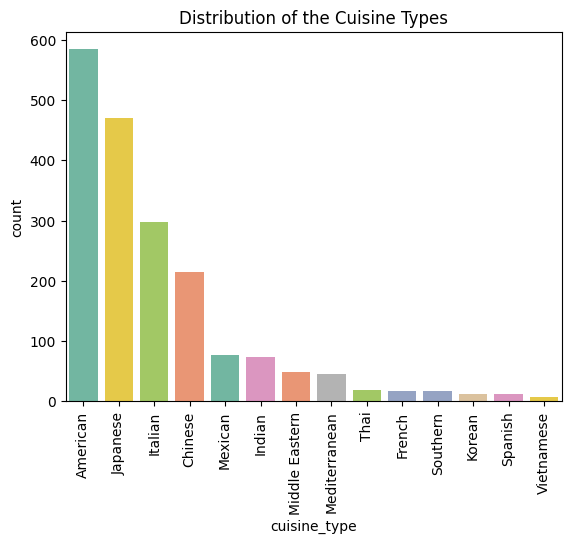

In [43]:
# Distribution of Cuisine types
# Determine the number of unique bars (categories)
num_bars = len(df['cuisine_type'].unique())

# Set the color palette based on the number of bars
palette = sns.color_palette('Set2', num_bars)
sns.countplot(data=df,x='cuisine_type',hue='cuisine_type', palette=palette, legend=False, order=df['cuisine_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of the Cuisine Types')
plt.show()

**Observations:**

* More number of orders are placed for `American` around `580` orders.
* Next highest order placed is for `Japanese` around `480` orders.
* Followed by `Italian`, `Chinese`, `Mexican`, `Indian`, `Middle Eastern`, `Medierranean`.
* Least popular cuisine type is `Vietnamese`. Least popular cuisines needs to improve their business by advertisements, promotions to drive higher demands and to attract more customers.

In [44]:
#outliers detection
outliers_dict = {}
# selecting the numerical columns of data and adding their names in a list
numeric_columns = df.select_dtypes(include=[np.number]).columns
for numeric_column in numeric_columns:
        # Drop NaN values before calculations since rating column has nan values
        Q1 = df[numeric_column].dropna().quantile(0.25)
        Q3 = df[numeric_column].dropna().quantile(0.75)
        IQR = Q3 - Q1#Inter Quantile Range (75th percentile - 25th percentile)
        lower_whisker = Q1 - 1.5 * IQR#Finding lower and upper bounds for all values. All values outside these bounds are outliers
        upper_whisker = Q3 + 1.5 * IQR
        outliers = df[(df[numeric_column] < lower_whisker) | (df[numeric_column] > upper_whisker)][numeric_column]
        outliers_dict[numeric_column] = outliers

print('Outliers identified in the numeric columns are as below:')
for col, outliers_series in outliers_dict.items():
  print(col)
  if outliers_series.empty:
    print('No outliers')
  else:
    print(outliers_series.to_list())

Outliers identified in the numeric columns are as below:
cost_of_the_order
No outliers
rating
No outliers
food_preparation_time
No outliers
delivery_time
No outliers


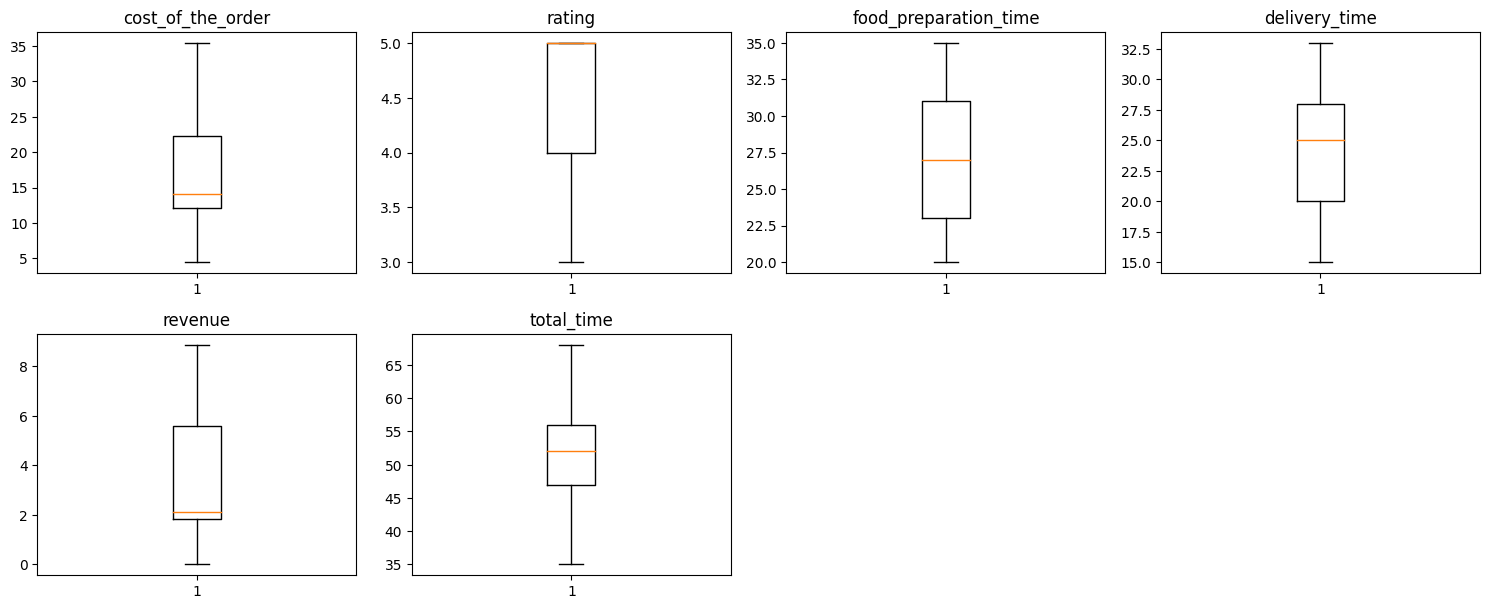

In [76]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
numeric_columns =df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable].dropna(), whis=1.5) # Drop NaN values for rating column
    plt.tight_layout()
    plt.title(variable)

plt.show()


Outliers in the data, using IQR:

As per the above Outlier calculation, we did not find any outliers in the data.
1. order_id - No outliers
2. customer_id - No outliers
3. cost_of_the_order - No outliers
4. food_preparation_time - No outliers
5. delivery_time - No outliers
6. rating - No outliers

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [46]:
#Use restaurant_analysis_sorted here to display top 5 restaurants
restaurant_analysis_sorted[['restaurant_name','count_of_orders']].head()

,restaurant_name,count_of_orders
136,Shake Shack,219
153,The Meatball Shop,132
21,Blue Ribbon Sushi,119
20,Blue Ribbon Fried Chicken,96
109,Parm,68


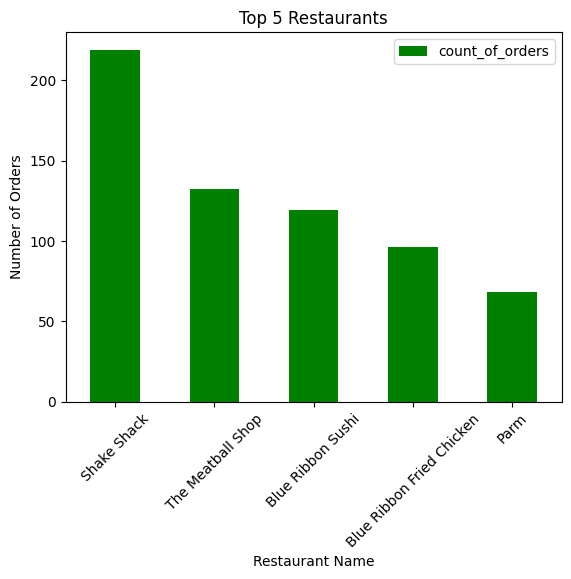

In [47]:
restaurant_analysis_sorted.head().plot(kind='bar', x='restaurant_name', y='count_of_orders', color='green')
plt.title('Top 5 Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

#### Observations:
* `Shake Shack` is the `top restaurant` with `219` orders.
* `The Meatball shop` is in the `second place` with `132` orders.
* `Blue Ribbon Sushi` is in the `third place` with `119` orders.
* `Blue Ribbon Fried Chicken` is in the `fourth place` with `96` orders.
* `Parm` takes the `fifth place` with `68` orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [48]:
#Use cuisine_analysis_sorted here to display most popular cuisine on weekends by sorting values based on the num_weekend_orders
cuisine_type_analysis_sorted_by_weekend = cuisine_type_analysis_sorted.sort_values(by='num_weekend_orders', ascending=False)
cuisine_type_analysis_sorted_by_weekend[['cuisine_type', 'num_weekend_orders']].iloc[0]

,0
cuisine_type,American
num_weekend_orders,415


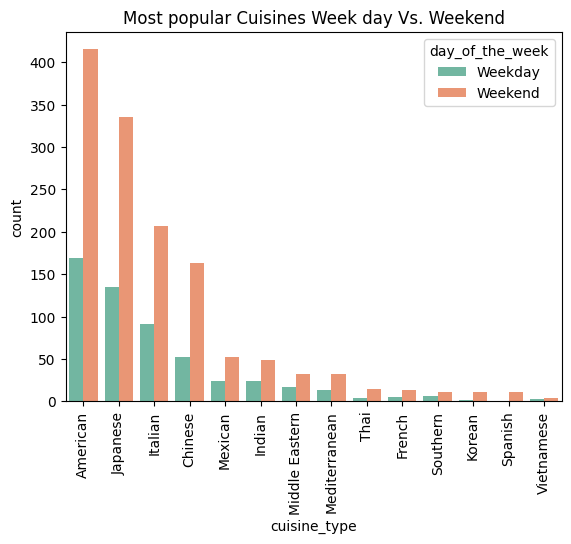

In [49]:
# Distribution of Day of the week
# Determine the number of unique bars (categories)
num_bars = len(df['day_of_the_week'].unique())

# Set the color palette based on the number of bars
palette = sns.color_palette('Set2', num_bars)
sns.countplot(data=df,x='cuisine_type',hue='day_of_the_week', palette=palette, order=df['cuisine_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Most popular Cuisines Week day Vs. Weekend')
plt.show()

#### Observations:
Most popular cuisine ordered on weekends is `American` and is of `415` orders followed by `Japanese` and `Italian`.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [50]:
# Write the code here
# First we need to filter the orders with cost_of_the_order column value > 20.
# df[df['cost_of_the_order'] > 20].shape[0]
# shape[0] returns the total number of orders in the filtered dataset. So apply shape[0] method on the filtered orders.
orders_greater_than_20 = df[df['cost_of_the_order'] > 20].shape[0]

# Print the number of orders that cost above $20
print('The number of orders that cost above $20 is:', orders_greater_than_20)

# Divide the return value by total number of orders i.e. df.shape[0] i.e. total orders and multiply by 100
percentage_above_20 = (orders_greater_than_20/df.shape[0])*100
percentage_below_20 = 100 - percentage_above_20

# Print the percentage
print('Percentage of the orders cost more than 20 dollars is: ',round(percentage_above_20,2),'%')

The number of orders that cost above $20 is: 555
Percentage of the orders cost more than 20 dollars is:  29.24 %


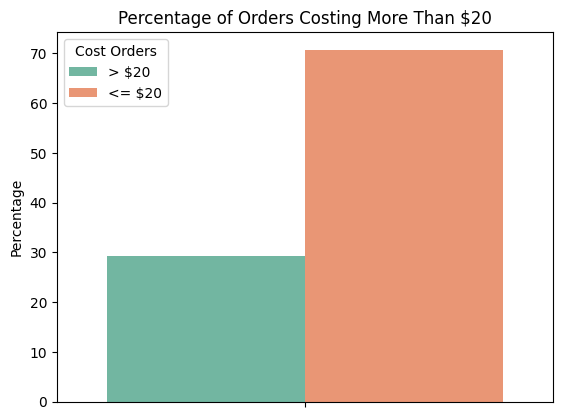

In [51]:
# Data for bar plot
data = {'Cost Orders': ['> $20', '<= $20'],
        'Percentage': [percentage_above_20, percentage_below_20]}

# Creating a DataFrame for the plot
df_cost_percentage = pd.DataFrame(data)

# Plotting the bar plot
# Set the color palette based on the number of bars
palette = sns.color_palette('Set2', 2)
sns.barplot(hue='Cost Orders', y='Percentage', data=df_cost_percentage, palette=palette)
plt.title('Percentage of Orders Costing More Than $20')
plt.ylabel('Percentage')
plt.show()

#### Observations:
* The number of total orders that cost above $20 is 555
* The percentage of orders over 20 dollars is `29.24%`

### **Question 10**: What is the mean order delivery time? [1 mark]

In [52]:
# Write the code here
# Get the mean delivery time and print it
print('The mean order delivery time is ', round(df['delivery_time'].mean(),2),'minutes')

The mean order delivery time is  24.16 minutes


#### Observations:
The mean order delivery time is `24.16` minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [53]:
# Write the code here
#value_counts provides total number of orders placed by each customer
#head(3) returns the top 3 customers and so apply head(3) on the value_counts() result on the dataframe with column 'customer_id'
top_3_customers = df['customer_id'].value_counts().head(3)
top_3_customers

,count
customer_id,
52832,13
47440,10
83287,9


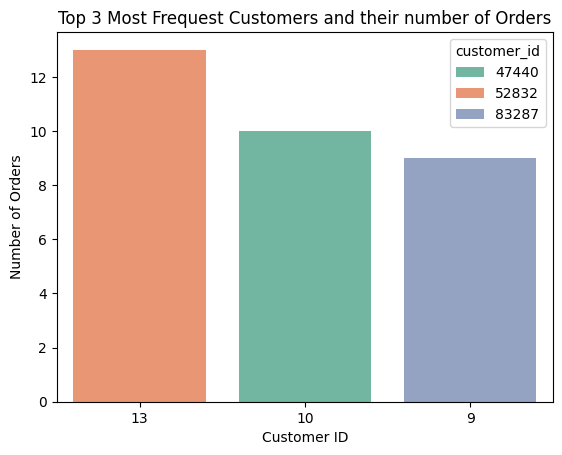

In [54]:
#set the palette
palette = sns.color_palette('Set2', 3)

#plot the graph
sns.barplot(x=top_3_customers, y=top_3_customers.values, hue=top_3_customers.index, palette=palette, order=top_3_customers.value_counts().index)

plt.title('Top 3 Most Frequest Customers and their number of Orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.show()

#### Observations:
Top 3 most frequent customer IDs are
* `52832` who placed total `13` orders
* `47440` who placed total `10` orders
* `83287` who placed `9` orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


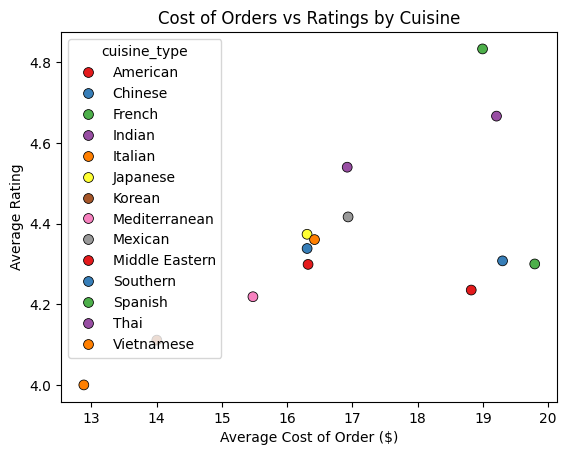

In [55]:
# Plot a scatter plot to evaluate Cost of orders vs Ratings vs Cuisine
# This plotting helps to understand the relation between cost of orders, ratings and cuisine type.
sns.scatterplot(data=cuisine_type_analysis_sorted, x='avg_cost', y='avg_rating', hue='cuisine_type', palette='Set1', s=50,  edgecolor='black')
plt.title('Cost of Orders vs Ratings by Cuisine')
plt.xlabel('Average Cost of Order ($)')
plt.ylabel('Average Rating')
plt.show()

**Observations:**

1. There is no strong correlation between cost and rating from the graph.
2. Some higher cost cuisines like `French` with average cost as `$19.79` managed to get average rating of `4.3`, `Thai` with average cost of `$19.20` managed to get average rating of `4.6`, `Spanish` with average cost of `$18.9` managed to get average rating of `4.8`. This indicates customers are rating better for restaurants with quality of food and possibly delivery time even though the cost is more.

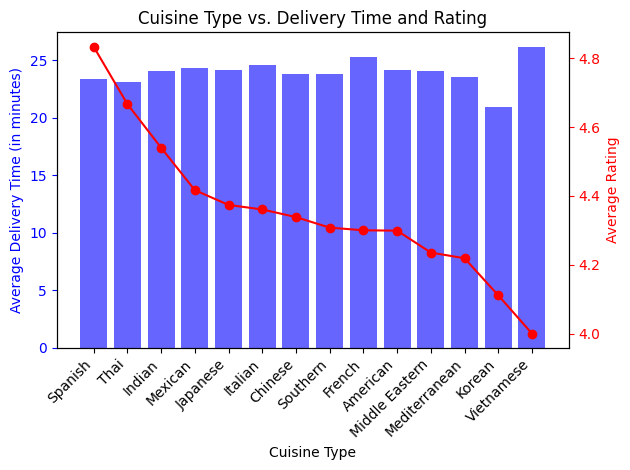

In [56]:
#Cuisine Type vs Rating and Delivery time
fig, axis1 = plt.subplots()
cuisine_type_analysis_sorted_by_rating = cuisine_type_analysis_sorted.sort_values(by='avg_rating', ascending=False)
#Plot a Bar chart for delivery time
axis1.bar(cuisine_type_analysis_sorted_by_rating['cuisine_type'], cuisine_type_analysis_sorted_by_rating['avg_delivery_time'], color='blue', alpha=0.6)
axis1.set_xlabel('Cuisine Type')
axis1.set_ylabel('Average Delivery Time (in minutes)', color='blue')
axis1.tick_params('y', colors='blue')

# Secondary axis for ratings
axis2 = axis1.twinx()
axis2.plot(cuisine_type_analysis_sorted_by_rating['cuisine_type'], cuisine_type_analysis_sorted_by_rating['avg_rating'], color='red', marker='o')
axis2.set_ylabel('Average Rating', color='red')
axis2.tick_params('y', colors='red')

plt.title('Cuisine Type vs. Delivery Time and Rating')
plt.setp(axis1.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Observations:**

The plot suggests restaurants like `Korean` with lower delivery times managing to get higher ratings while restaurants like `Vietnamese` are affected by longer delivery times and lower ratings.

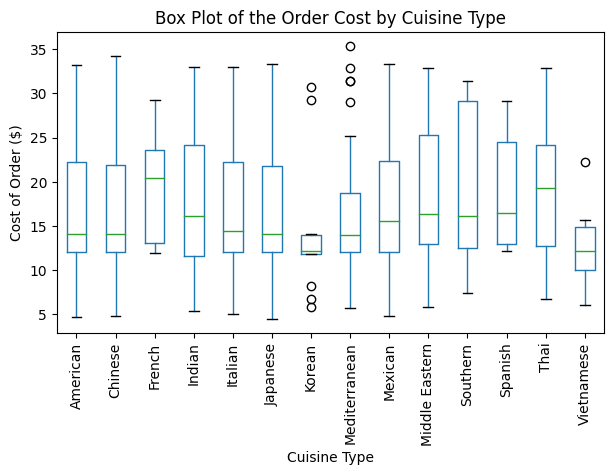

In [57]:
#Boxplot of Order Cost by Cuisine Type
df.boxplot(column='cost_of_the_order', by='cuisine_type', grid=False, rot=45)
plt.title('Box Plot of the Order Cost by Cuisine Type')
plt.suptitle('')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of Order ($)')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Observations:

The plot highlights the variation of cost across cuisines. `French` cuisine has higher prices while `Vietnamese` has much lower prices.

In [58]:
# Step 1: Group by customer and restaurant to count the number of orders for each restaurant
customer_restaurant_orders = df.groupby(['customer_id', 'restaurant_name'],observed=False).agg(
    num_orders=('order_id', 'count')
).reset_index()

# Step 2: Identify customers who reordered (loyal customers)
loyal_customers = customer_restaurant_orders[customer_restaurant_orders['num_orders'] > 1]

# Step 3: Calculate total unique customers
total_customers = df['customer_id'].nunique()

# Step 4: Calculate the number of unique loyal customers (those who reordered)
loyal_customer_count = loyal_customers['customer_id'].nunique()

# Step 5: Compute the percentage of loyal customers
loyalty_percentage = (loyal_customer_count / total_customers) * 100

# Display the loyalty percentage
print(f"Percentage of customers with repeat orders: {loyalty_percentage:.2f}%")


Percentage of customers with repeat orders: 27.33%


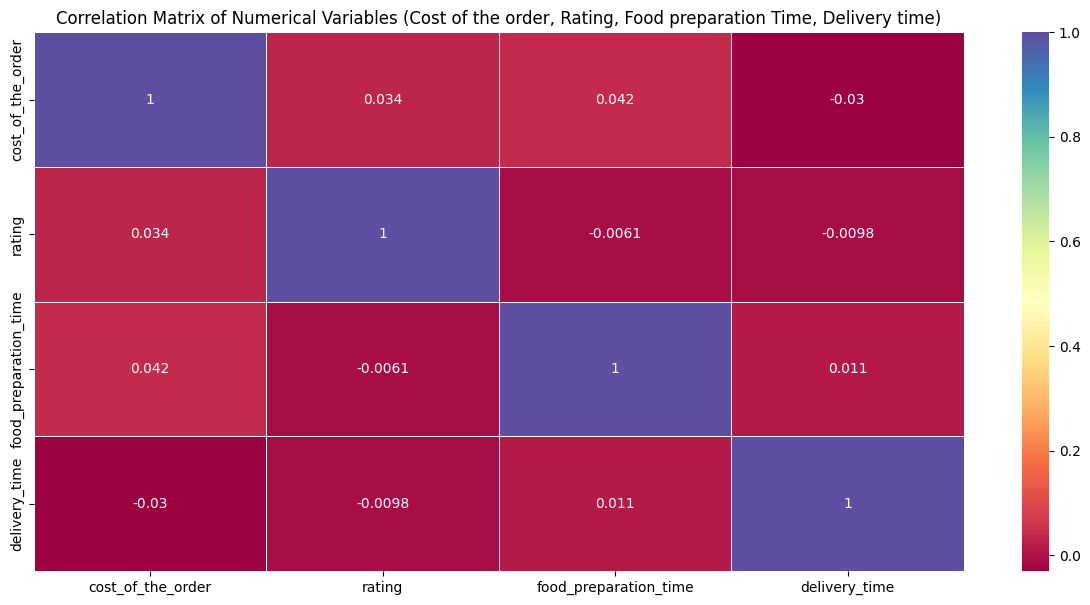

In [59]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Spectral", linewidths=0.5)
plt.title ('Correlation Matrix of Numerical Variables (Cost of the order, Rating, Food preparation Time, Delivery time)')
plt.show()

**Observations:**

1. There is no much strong correlation observed between any of the two variables as all values are close to 0.00 as per the correlation diagram.
2. `cost_of_the_order` has high positive correlation with `food_preparation_time` (`0.042`) and `rating` (`0.034`).
3. This indicates rating increases as cost of the order increases.
4.` delivery_time` has negative correlation with `cost of the order` that indicates as cost of the order increases, delivery time decreases slightly.


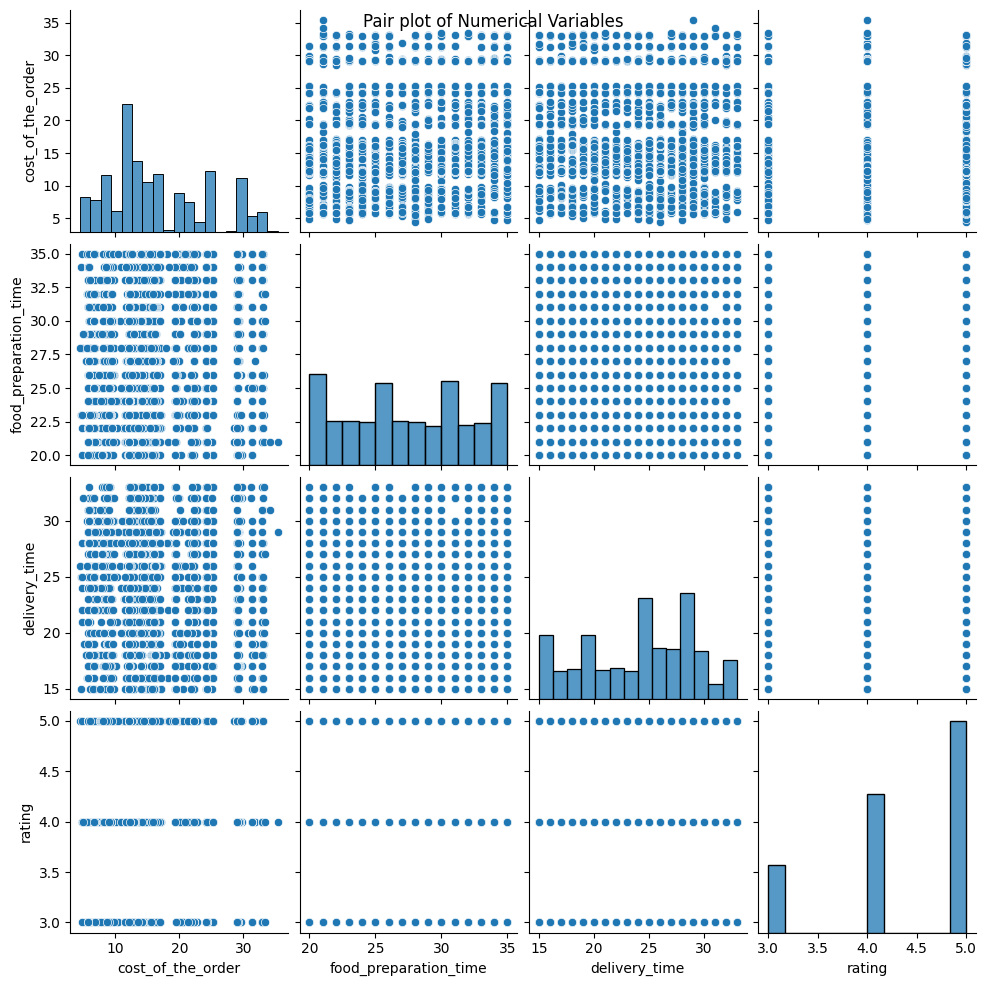

In [60]:
# Analyze distribution and relationship between pairs of numeric variables
sns.pairplot(df[['cost_of_the_order','food_preparation_time','delivery_time','rating']])
plt.suptitle('Pair plot of Numerical Variables')
plt.show()

**Observations:**

There is no significant linear patterns between any of the two variables.

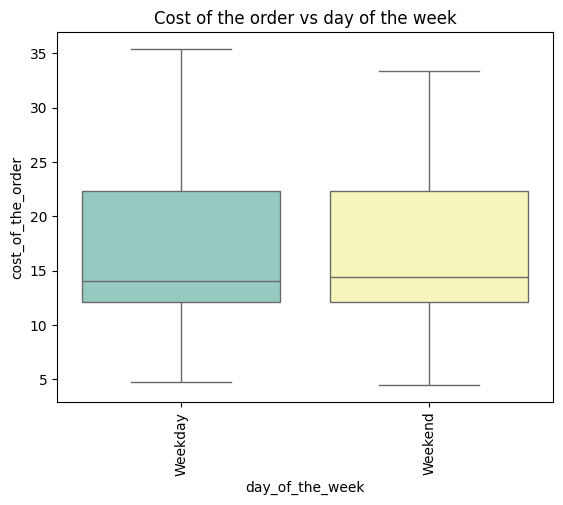

In [61]:
# Plot a boxplot to identify relationship between numericals and categorical variables
# Boxplot for day of the week vs cost of the order
sns.boxplot(data=df,x='day_of_the_week', y='cost_of_the_order', hue='day_of_the_week', palette="Set3",dodge=False)
plt.title('Cost of the order vs day of the week')
plt.xticks(rotation=90)
plt.show()

**Observations:**

1. There are no indicators that the day of the week significantly impacts the cost of the orders.
2. Orders on both weekend and week days costs around 14 dollars as median and maximum between 33 dollars to 36 dollars.

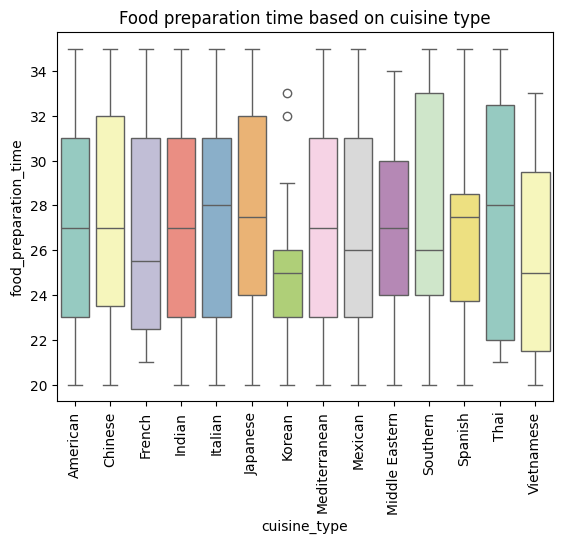

In [62]:
# Plot a boxplot to identify relationship between numericals and categorical variables
# Boxplot for day of the cuisine type vs food preparation time
sns.boxplot(data=df,x='cuisine_type', y='food_preparation_time', hue='cuisine_type', palette="Set3",dodge=False)
plt.title('Food preparation time based on cuisine type')
plt.xticks(rotation=90)
plt.show()


**Observations:**

1. Food preparation time is same for most of the cuisine types.
2. The median food prepation time is between 24 and 30 minutes.
3. Korean cuisine has outliers present for the food preparation time and it takes less time to prepare compared to others.

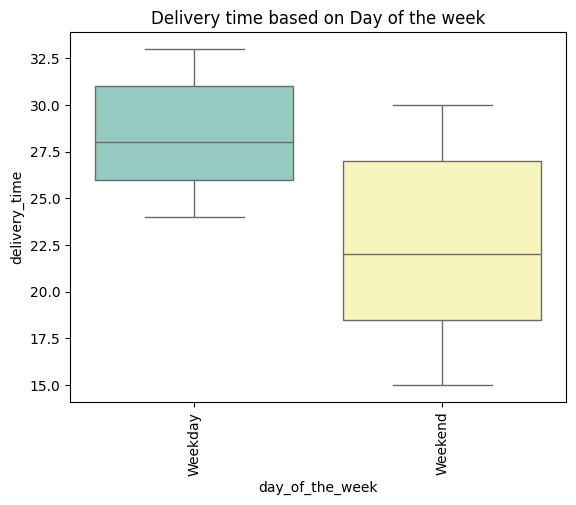

In [63]:
# Plot a boxplot to identify relationship between numericals and categorical variables
# Boxplot for day of the week vs delivery time
sns.boxplot(data=df,x='day_of_the_week', y='delivery_time', hue='day_of_the_week', palette="Set3",dodge=False)
plt.title('Delivery time based on Day of the week')
plt.xticks(rotation=90)
plt.show()


**Observations:**

The delivery time for orders on the weekend is less than weekday. The median delivery time on the week days is around 28.5 minutes and on the weekend is around 22.5 minutes

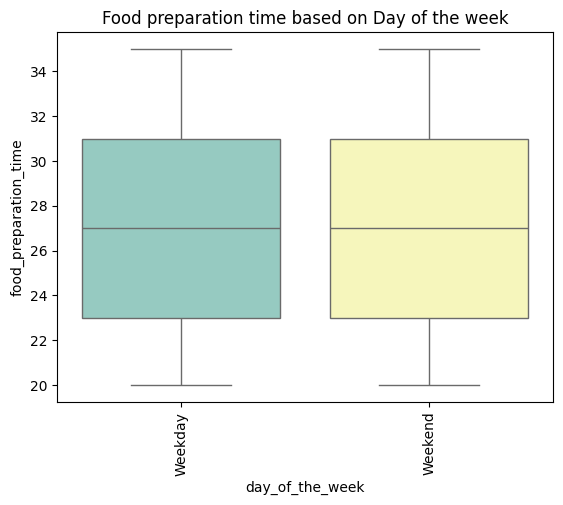

In [64]:
# Plot a boxplot to identify relationship between numericals and categorical variables
# Boxplot for day of the week vs food preparation time
sns.boxplot(data=df,x='day_of_the_week', y='food_preparation_time', hue='day_of_the_week', palette="Set3",dodge=False)
plt.title('Food preparation time based on Day of the week')
plt.xticks(rotation=90)
plt.show()

**Observations:**

There is no indicators that the day of the week significantly impacts the food preparation time.

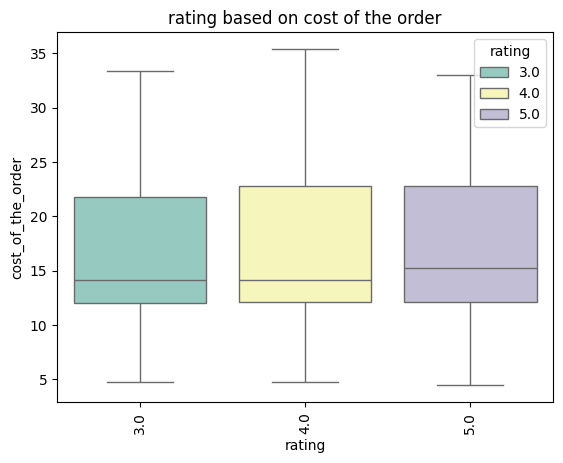

In [65]:
# Plot a boxplot to identify relationship between numericals and categorical variables
# Boxplot rating vs cost of the order
sns.boxplot(data=df,x='rating', y='cost_of_the_order', hue='rating', palette="Set3",dodge=False)
plt.title('rating based on cost of the order')
plt.xticks(rotation=90)
plt.show()

**Observations:**

There are no indicators that shows the cost of the order impacts rating.

In [66]:
# Another interesting feature to be identified is how much revenue each of the restuarant has generated.
# Sort the restaurants by total revenue and get the head and tail to see the top 5 and last 5 revenues
restaurant_analysis_sorted[['restaurant_name','total_revenue']].sort_values(by='total_revenue',ascending=False)

,restaurant_name,total_revenue
136,Shake Shack,3579.53
153,The Meatball Shop,2145.21
21,Blue Ribbon Sushi,1903.95
20,Blue Ribbon Fried Chicken,1662.29
109,Parm,1112.76
...,...,...
96,Market Table,6.79
164,Wa Jeal,6.74
39,Cipriani Le Specialita,5.92
17,Big Wong Restaurant _¤¾Ñ¼,5.92


Observations:

**Top 5 restaurants in terms of total revenue generation:**

1. `Shake Shack` restaurant has earned `$3579.53` and stands in the first place 2. `The Meatball shop` having total revenue as `$2145.21`
3. Third place goes to `Blue Ribbon Fried Chicken` with total revenue `$1903.95`
4. Fourth place goes to `Blue Ribbon Fried Chicken` with total revenue as `$1662.29`
5. `Parm` stands in the 5 position with the total revenue as `$1112.76`

**Least 5 restaurants in terms of total revenue generation:**

Least revenue generated restaurants are `Market Table`, `Wa Jeal`, `Cipriani Le Specialita`,`Big Wong Restaurant _¤¾Ñ¼,Chinese` and `Hunan Manor`.



**Feature Engineering:**

So far we have identified the relationship with respect to customer ratings that are given by the customers. But, we should also identify why certain customers did not provide rating. In order to do that we need to create a categorical column `rating_given` with values if rating is np.nan then 'Not given' else 'Given' if a numerical rating [3,4,5] that is provided by the customers.

In [67]:
# create a categorical column for rating and replace the values based on check isna()
df['rating_given'] = np.where(df['rating'].isna(), 'Not given','Given')

#analyze ratings (given, not given) based on cuisine_type, delivery_time and food_preparation_time
rating_not_given_analysis = df.groupby(['cuisine_type', 'rating_given'],observed=False).agg(
    avg_delivery_time=('delivery_time', 'mean'),
    avg_food_preparation_time=('food_preparation_time', 'mean'),
    count_of_orders=('order_id', 'count')
).reset_index()

# This will provide the details about average delivery time taken, average food preparation time
#and the count of orders for each cuisine based on if rating is given or not.
rating_not_given_analysis

,cuisine_type,rating_given,avg_delivery_time,avg_food_preparation_time,count_of_orders
0,American,Given,24.396739,27.388587,368
1,American,Not given,23.847222,27.527778,216
2,Chinese,Given,23.496241,27.977444,133
3,Chinese,Not given,24.439024,26.756098,82
4,French,Given,25.100000,26.600000,10
5,French,Not given,25.625000,27.250000,8
6,Indian,Given,23.300000,26.280000,50
7,Indian,Not given,25.782609,28.913043,23
8,Italian,Given,25.209302,27.627907,172
9,Italian,Not given,23.690476,27.285714,126


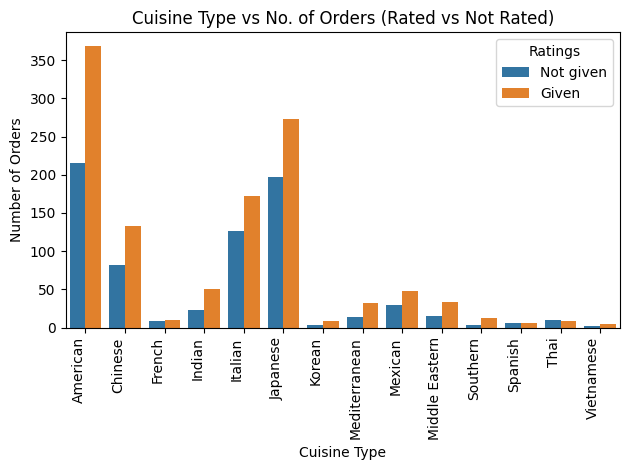

In [68]:
# Plotting a graph to visualize the analysis
sns.countplot(data=df, x='cuisine_type', hue='rating_given')
plt.title('Cuisine Type vs No. of Orders (Rated vs Not Rated)')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Ratings')
plt.tight_layout()
plt.show()

**Observations:**

1. If we check average delivery time for rating 'Not given' and 'Given' there is no much information on why customer did not provide rating. For example, American cuisine has average delivery time for given is 24.39 minutes whereas average delivery time for rating not given is 23.84 minutes. Whereas for Chinese cuisine it is 23.49 minutes for rating given and 24.43 minutes for not given. So, there is no pattern.

  Same conclusion can be observed for average food preparation time for rating 'Not given' vs 'Given'.

2. From the graph, American, Japanese and Italian cuisines were not rated by most of the customers. But we cannot derive the reason behind that other than speculating customers might have ignored or did not pay attention to rating page. Or skipped it.



In [69]:
# Let's do the similar analysis for restaurant vs rating
rating_not_given_analysis_for_restaurants = df.groupby(['restaurant_name', 'rating_given'], observed=False).agg(
    avg_delivery_time=('delivery_time', 'mean'),
    avg_food_preparation_time=('food_preparation_time', 'mean'),
    count_of_orders=('order_id', 'count')
).reset_index()

# This will provide restaurants that has ratings given by the customer vs not and identify if there are any patterns that can be observed
top_restaurants = df['restaurant_name'].value_counts().nlargest(10).index
filtered_restaurants = rating_not_given_analysis_for_restaurants[rating_not_given_analysis_for_restaurants['restaurant_name'].isin(top_restaurants)]
filtered_restaurants

,restaurant_name,rating_given,avg_delivery_time,avg_food_preparation_time,count_of_orders
40,Blue Ribbon Fried Chicken,Given,24.171875,26.984375,64
41,Blue Ribbon Fried Chicken,Not given,24.093750,27.625000,32
42,Blue Ribbon Sushi,Given,23.260274,27.671233,73
43,Blue Ribbon Sushi,Not given,25.021739,28.326087,46
44,Blue Ribbon Sushi Bar & Grill,Given,23.636364,26.363636,22
45,Blue Ribbon Sushi Bar & Grill,Not given,23.181818,26.227273,22
132,Han Dynasty,Given,23.043478,28.043478,23
133,Han Dynasty,Not given,23.260870,26.782609,23
218,Parm,Given,25.743590,27.153846,39
219,Parm,Not given,25.172414,27.517241,29


**Observations:**

1. Based on the analysis, restaurant 'Blue Ribbon Fried Chicken' took average delivery time of 24.17 minutes for rated orders vs 24.09 minutes for unrated orders. Similarly, 'Blue Ribbon Sushi' tool average delivery time of 23.26 minutes for rated orders vs 25.02 minutes for unrated orders. Though there is no much difference in the average delivery times, but it is possible customers are looking for quick delivery times and might be rating those orders which are delivered faster from the same restaurants.

2. Some of the restaurants have <=2 minutes delta for average food preparation times which might be adding delays to delivery time.

3. With some anonalies in the behavior, for the restaurant 'RedFarm Hudson', the average food preparation time for rating given is 28.14 minutes while not rated is 25.57 minutes. Since the behavior is not consistent, we cannot derive any conclusions based on the delivery time and food preparation time for customer providing rating or not.

In [70]:
# Let's summarize the findings by calculating the average delivery time and food preparation time for 'Not given' and 'Given'

# Get the not given and given rating data
not_given_ratings_data = df[df['rating_given'] == 'Not given']
given_ratings_data = df[df['rating_given'] == 'Given']

# Statistical analysis to compare delivery and preparation times between the two categories
not_given_avg_delivery_time = round(not_given_ratings_data['delivery_time'].mean(),2)
given_avg_delivery_time = round(given_ratings_data['delivery_time'].mean(),2)

not_given_avg_prep = round(not_given_ratings_data['food_preparation_time'].mean(),2)
given_avg_prep = round(given_ratings_data['food_preparation_time'].mean(),2)

# Print the average times for analysis
print("Average Delivery Time for customer not rated orders is:",not_given_avg_delivery_time," minutes")
print("Average Delivery Time for customer rated orders is:",given_avg_delivery_time," minutes")

print("Average Food Preparation Time for customer not rated orders is:", not_given_avg_prep,"minutes")
print("Average Food Preparation Time for customer rated orders is:",given_avg_prep," minutes")

Average Delivery Time for customer not rated orders is: 24.17  minutes
Average Delivery Time for customer rated orders is: 24.15  minutes
Average Food Preparation Time for customer not rated orders is: 27.36 minutes
Average Food Preparation Time for customer rated orders is: 27.38  minutes


**Observations:**

Based on the average delivery time between rated and not rated orders, there is not much difference. It might be just customers have other reasons not to rate them. FoodHub need to take action to let customers rate the orders without fail.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [71]:
# Use the restaurant_analysis_sorted calculated above.
# Filter data based on the condition if the rating_count > 50 and the avg_rating > 4
promotional_offer_ratings = restaurant_analysis_sorted[(restaurant_analysis_sorted['rating_count']> 50) & (restaurant_analysis_sorted['avg_rating'] > 4)]
# Sort values by avg_rating and select columns restaurant_name, rating_count and avg_rating from the filtered dataset
promotional_offer_ratings.sort_values(by='avg_rating', ascending=False)[['restaurant_name', 'rating_count','avg_rating']]

,restaurant_name,rating_count,avg_rating
153,The Meatball Shop,84,4.511905
20,Blue Ribbon Fried Chicken,64,4.328125
136,Shake Shack,133,4.278195
21,Blue Ribbon Sushi,73,4.219178


#### Observations:

The restaurants that fulfill the criteria to get the promotion offer are:
1. `The Meatball Shop` with rating` 4.5` and the rating count is `84`
2. `Blue Ribbon Fried Chicken` with rating `4.3` and the rating count is `64`
3.` Shake Shack` with rating `4.2` and the rating count is `133`
4. `Blue Ribbon Sushi` with rating `4.2` and the rating count is `73`

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [72]:
# Write the code here
def compute_net_revenue(dollars):
  if (dollars > 20):
      return dollars * 0.25
  elif (dollars > 5):
      return dollars * 0.15
  else:
      return 0

df['revenue'] = df['cost_of_the_order'].apply(compute_net_revenue)

print('The net revenue is ', round(df['revenue'].sum(),2), 'dollars')

The net revenue is  6166.3 dollars


#### Observations:

The net revenue generated by company across all the orders is `$6166.3`

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [73]:
# Write the code here
#1. Calculate the total time for each order by considering food_prepation_time and delivery_time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
#2. Filter orders by total time > 60 minutes
orders_above_60_minutes = df[df['total_time'] > 60]
orders_above_60_minutes
#3. Calculate the percentage of these orders in relation to the total number of orders
percentage_above_60_minutes = (len(orders_above_60_minutes) / len(df)) * 100
print('Percentage of orders take more than 60 minutes to get delivered from the time the order is placed is ', round(percentage_above_60_minutes,2),'%')


Percentage of orders take more than 60 minutes to get delivered from the time the order is placed is  10.54 %


#### Observations:
Percentage of orders that takes more than 60 minutes to get delivered is `10.54%`

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [74]:
# Write the code here
#Step1: Group by 'day_of_the_week' and calculate the average delivery_time
mean_delivery_time = df.groupby('day_of_the_week',observed=False)['delivery_time'].agg(['mean','sum','count'])
mean_delivery_time

,mean,sum,count
day_of_the_week,,,
Weekday,28.340037,15502,547
Weekend,22.470022,30357,1351


#### Observations:
1. Mean Delivery Time during Weekdays is `28.34 minutes`
2. Mean Delivery Time during Weekends is `22.47 minutes`
3. Number of deliveries on weekday is `547 orders` compared to weekends where `1351 orders` are delivered.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

* Analyzed dataset of `1898` orders with `9` different columns.
* `736` orders were not rated and so the analysis was done based on the rated orders vs cuisines and restaurants.
* There are only 3, 4 and 5 ratings available in the dataset. There are no ratings 1 or 2. This may indicate customers would have avoided ratings 1 and 2 and so `736 orders` (`38.78%`) might not be rated because customers were not satisfied. Only satisfied customers would have provided ratings (3,4,5).
* No outliers found in the dataset.

**Conclusions based on analysis**

**Cuisine Ratings:**
* `Spanish` has the highest average rating of `4.83` followed by `Thai` with average rating of `4.66`, `Indian` with average rating of `4.54`. This indicates these restaurants are performing well in terms of customer satisfaction.
* `Vietnamese` has lowest rating of `4.00` which suggests that the restaurant has to improve in customer satisfaction.
* Majority of customers has given rating 5 (`588` customers) followed by 4 (`386` customers)
* `American` cuisine is the most popular cuisine on weekends. There is a possibility of having more American ethnic people in the demographic area compared to other ethnic groups. Another possibility is the restuarants might be preparing American cuisine well compared to other cuisines.
* Higher cost cuisines like `French`, `Italian` and `Indian` managed to get higher rating even when the price is more indicatings some of customers are preferring quality food and delivery time even when the cost is high.

**Delivery Time:**
* The average delivery time ranges from `20.9 minutes` for `Korean cuisine` to `26.1 minutes` for `Vietnamese cuisine` and `25.3 minutes` for `French`.
* This indicates Korean cuisine is benefting from efficient delivery service and Vietnamese, French cuisines are suffering with longer delivery times thus impacting the customer satisfaction. But overall, there is not much difference in delivery times.

**Cost of the orders:**
* The highest average cost is associated with `French cuisine` at `$19.79`, followed by `Southern` at `$19.3` and `Thai` at `$19.2`.
* Lowest average cost is for `Vietnamese` at `$12.88`. This indicates lower priced food items might be influencing the lower ratings.

**Number of orders:**
* Highest number of orders have been received by `American` with `584 orders`	(`169 orders` - Weekdays,	`415 orders` - Weekends), `Japanese` with `470	orders` (`135 orders` - Weekdays,	`335 orders` - Weekends) and `Italian` with `298 orders` (`91 orders` -  Weekdays,	`207 orders` - Weekends).
* Least popular are `Vietnamese` with` 7 orders` (`3 orders` - Weekdays,	`4 orders` - Weekends).
* Most of the orders are made on the weekend (> 1300).

**Popular Restaurants:**
* `Shake Shack` restaurant is the most popular restaurant with `219 total orders` (`74 orders` - Weekdays,	`145 orders` - Weekends) followed by `The Meatball Shop` which received `132 orders`	(`37 orders` - Weekdays,	`95 orders` - Weekends).
* There are restaurants like `Lamarca Pasta`,`Hunan Manor`,`Il Bambino` which has received only 1 order. These restaurants might have poor quality or did not spend much efforts on advertisements and promotions.

**Customer Loyalty:**
* Percentage of customers who have placed more than 1 orders: `27.33%`.

Identify these customers and provide them some kind of incentives to retain the customers.

**Frequent Customer's preferences for cuisines:**
Percentage of cuisines who got more than 5 orders for a cuisine from frequent customers are:
* `American - 2.73%`
* `Indian - 8.21%`
* `Italian - 0.67%`
* `Japanese - 2.55%`

These are the most preferred cuisines by the customers.

**Other observations:**
* High-rated but less popular cuisines like `Spanish` and `Thai` has an opportunity to get more popular by advertising, promotions.
* Over `38%` of customers did not provide ratings which seems to be a major issue.
* Most of the orders are less than $20. There is a possibility of customers going for lower price orders compared to higher prices in that particular demographic area.
* There are around `10.54%` of orders that took `more than 60 minutes` to get delivered from the time the order is placed. FoodHub need to pay attention to those orders and see what caused the delays and improve in order to gain customer confidence. May need to reward delivery persons who delivers before or on time as promised.
  

### Recommendations:

1. **Promote high-rated cuisines**: Cuisines like `Spanish`, `Thai` and `Indian` has higher average ratings. FoodHub should advertise these ratings and reviews in TV channels, websites, fliers to attract more customers. Also has to emphasize on speed of delivery and promotional offers. Marketing focus should help these cuisines to be purchased more on the app.
2. **Improve delivery times for long delivery cuisines**: FoodHub needs to work with restaurants that prepare cuisines like `Vietnamese` which are taking longer delivery times need by focusing on improving the customer satisfaction through introducing better promotional offers that helps to retain customers, also should focus on searching restaurants that provides similar cuisines near to customer base to reduce the overall delivery times.
3. **Improve quality of service**: Cuisines like `Vietnamese` has the lowest rating and longest delivery time. They seems to have issues with quality of food and not following best routes to reach the customer. FoodHub has to purchase better maps software that lets the delivery person to reach the customer with optimized route and avoid congested areas/accidents/traffic jams.
4. **Frequent customer/loyal customer points**: `American`, `Japanese` cuisines are getting more orders. FoodHub should focus on retaining the customers by providing the customer loyal points and discounts.
5. **Encourage ratings**: To encourage customer to provide ratings, FoodHub should provide incentives for customers who give ratings on their app.
6. **Analyze customer preferences**: Group customers based on the orders they have placed like most ordered cuisines, restaurants and display coupons and promotions related to the similar orders. Also show frequently orders to pick from, when customer is placing new order so that they don't have to search for their previous order items in the menu.
7. **Promotions based on the day of the week**: Based on the number of orders placed on weekend vs weekdays FoodHub should consider offering discounts like lunchtime discounts, breakfast discounts to attract the customers where the trend of lowest orders is observed.
8. **Bundle offers**: Provide offers like combo deals, bundling of most selling items with least selling items. Thus least sellings items also get rated and increases the popularity in the customer searches.
9. **Take customer feedback**: Seriously consider the feedback provided by customers and identify the areas of complaints and resolve them with highest priority. Announce lucky winners every month out of customers who provides feedback and invite loyal customers in the company events.

---

In [77]:
!jupyter nbconvert --to html /content/drive/MyDrive/Python/Project1-Python-Foundations-FoodHub/Learner_Notebook_Full_Code.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Python/Project1-Python-Foundations-FoodHub/Learner_Notebook_Full_Code.ipynb to html
[NbConvertApp] Writing 2364827 bytes to /content/drive/MyDrive/Python/Project1-Python-Foundations-FoodHub/Learner_Notebook_Full_Code.html
